<a href="https://colab.research.google.com/github/Venchislav/Neural-Networks/blob/main/MNIST_AutoEncoders_Generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://blog.keras.io/img/ae/autoencoder_schema.jpg' align='right'>

In [1]:
import keras
from keras import layers
from keras.datasets import mnist
import numpy as np

In [2]:
(X_train, _), (X_test, _) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

In [5]:
X_train.shape

(60000, 784)

In [6]:
encoding_dim = 32

In [7]:
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
decoded = layers.Dense(784, activation='sigmoid')(encoded)

autoencoder = keras.Model(input_img, decoded)

In [8]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 784)               25872     
                                                                 
Total params: 50992 (199.19 KB)
Trainable params: 50992 (199.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


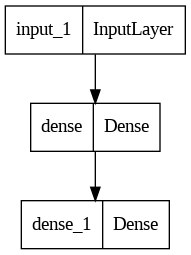

In [9]:
keras.utils.plot_model(autoencoder)

In [10]:
encoder = keras.Model(input_img, encoded)

In [11]:
type(autoencoder.layers[-1])

keras.src.layers.core.dense.Dense

In [12]:
encoded_input = keras.Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]

decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [13]:
autoencoder.compile(
    optimizer='adam',
    loss='binary_crossentropy'
)

In [14]:
autoencoder.fit(
    X_train, X_train,
    epochs=20,
    batch_size=64,
    shuffle=True,
    validation_data=(X_test, X_test)
)

Epoch 1/20
938/938 [==============================] - 6s 4ms/step - loss: 0.1914 - val_loss: 0.1326
Epoch 2/20
938/938 [==============================] - 3s 4ms/step - loss: 0.1191 - val_loss: 0.1064
Epoch 3/20
938/938 [==============================] - 3s 3ms/step - loss: 0.1023 - val_loss: 0.0969
Epoch 4/20
938/938 [==============================] - 4s 4ms/step - loss: 0.0967 - val_loss: 0.0940
Epoch 5/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0950 - val_loss: 0.0932
Epoch 6/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0943 - val_loss: 0.0928
Epoch 7/20
938/938 [==============================] - 4s 4ms/step - loss: 0.0940 - val_loss: 0.0925
Epoch 8/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0938 - val_loss: 0.0925
Epoch 9/20
938/938 [==============================] - 3s 4ms/step - loss: 0.0936 - val_loss: 0.0923
Epoch 10/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0935 - val_loss: 0.0922

In [15]:
encoded_imgs = encoder.predict(X_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 1s 1ms/step


In [16]:
decoded_imgs[0].shape

(784,)

In [17]:
import matplotlib.pyplot as plt

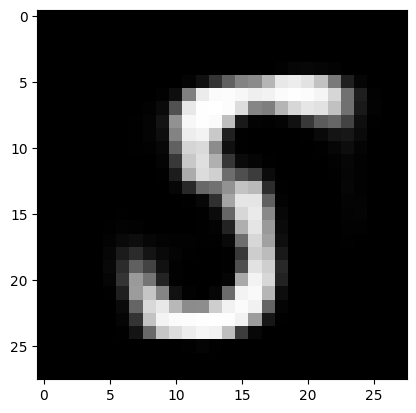

In [18]:
n = 1
index = np.random.choice(X_test.shape[0], n, replace=False)

plt.imshow(decoded_imgs[index].reshape(28, 28, 1), cmap='gray');

In [19]:
# THIS IS ART!

# **BUT WE've been using Flat data**
# **NOW LET's APPLY CONVs**

In [20]:
(X_train, _), (X_test, _) = mnist.load_data()

In [21]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

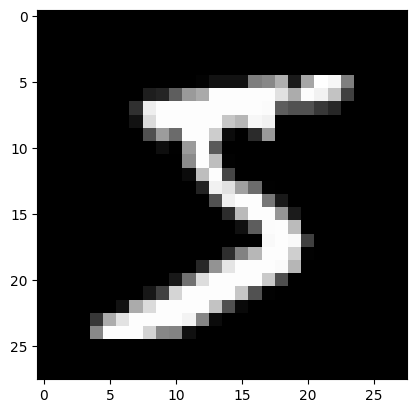

In [22]:
plt.imshow(X_train[0], cmap='gray');

In [23]:
from keras import layers

input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)

In [24]:
autoencoder.compile(
    optimizer='adam',
    loss='binary_crossentropy'
)

In [25]:
autoencoder.fit(
    X_train, X_train,
    epochs=10,
    verbose=2,
    batch_size=64,
    shuffle=True,
    validation_data=(X_test, X_test)
)

Epoch 1/10
938/938 - 15s - loss: 0.1703 - val_loss: 0.1268 - 15s/epoch - 15ms/step
Epoch 2/10
938/938 - 5s - loss: 0.1220 - val_loss: 0.1160 - 5s/epoch - 6ms/step
Epoch 3/10
938/938 - 6s - loss: 0.1145 - val_loss: 0.1116 - 6s/epoch - 6ms/step
Epoch 4/10
938/938 - 5s - loss: 0.1100 - val_loss: 0.1075 - 5s/epoch - 6ms/step
Epoch 5/10
938/938 - 6s - loss: 0.1071 - val_loss: 0.1050 - 6s/epoch - 6ms/step
Epoch 6/10
938/938 - 5s - loss: 0.1048 - val_loss: 0.1026 - 5s/epoch - 6ms/step
Epoch 7/10
938/938 - 6s - loss: 0.1030 - val_loss: 0.1012 - 6s/epoch - 6ms/step
Epoch 8/10
938/938 - 5s - loss: 0.1015 - val_loss: 0.0995 - 5s/epoch - 5ms/step
Epoch 9/10
938/938 - 5s - loss: 0.1003 - val_loss: 0.0986 - 5s/epoch - 6ms/step
Epoch 10/10
938/938 - 5s - loss: 0.0993 - val_loss: 0.0978 - 5s/epoch - 6ms/step


In [25]:
decoded_imgs = autoencoder.predict(x_test)

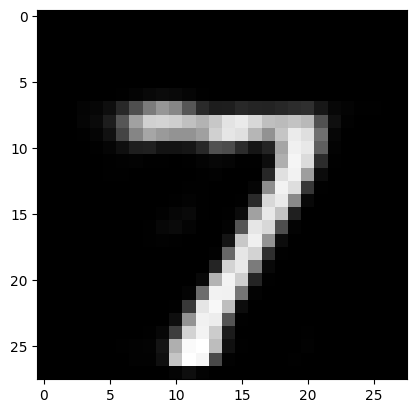

In [27]:
plt.imshow(decoded_imgs[0].reshape(28, 28, 1), cmap='gray');